# Visualization with Seaborn

Compared with `Matplotlib`, `seaborn` provides a more advanced and cleaner API on top of Matplotlib, and is more friendly with Pandas `DataFrame`.

In [31]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6), 0)

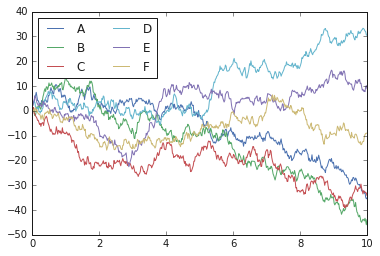

In [33]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc=0)

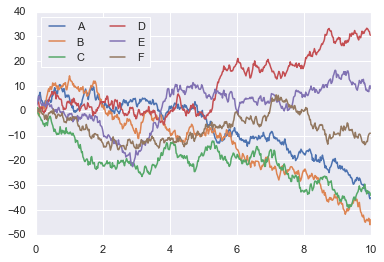

In [34]:
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc=0)

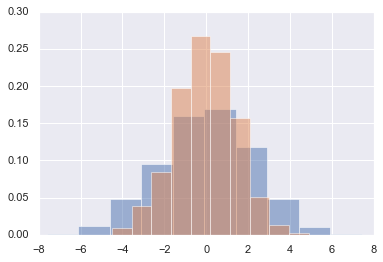

In [43]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

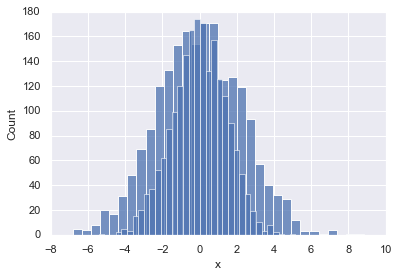

In [36]:
for col in 'xy':
    sns.histplot(data[col])

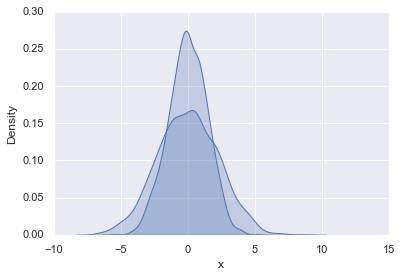

In [39]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

C:\Users\guoly\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guoly\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


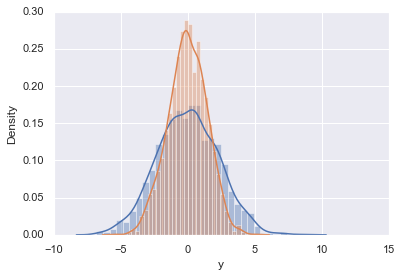

In [41]:
sns.distplot(data['x'])
sns.distplot(data['y'])

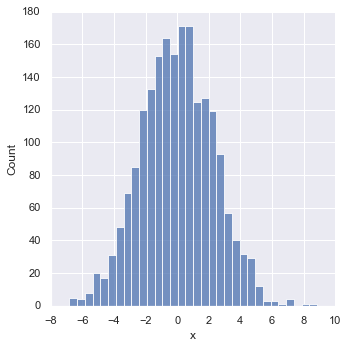

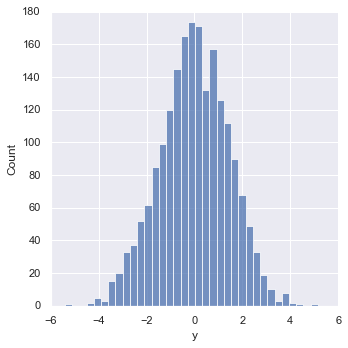

In [42]:
sns.displot(data['x'])
sns.displot(data['y'])

In [45]:
data

,x,y
0,-1.557137,-2.646501
1,-0.007094,-0.127565
2,0.930044,-1.124437
3,-1.007036,-0.012562
4,2.371424,-1.085523
...,...,...
1995,1.886578,3.278161
1996,0.954060,-0.714136
1997,0.358806,1.225547
1998,0.465341,-2.550349


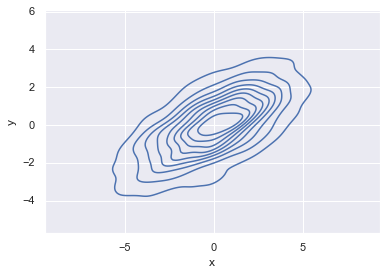

In [56]:
sns.kdeplot(x=data['x'], y=data['y'])

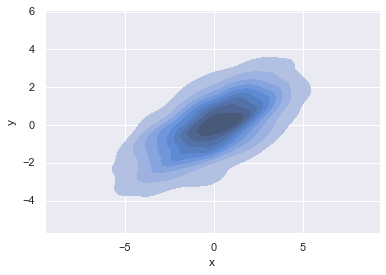

In [57]:
sns.kdeplot(x=data['x'], y=data['y'], fill=True)

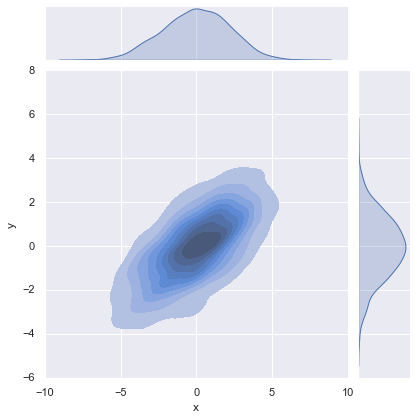

In [64]:
sns.jointplot(x='x', y='y', data=data, kind='kde', fill=True)

C:\Users\guoly\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


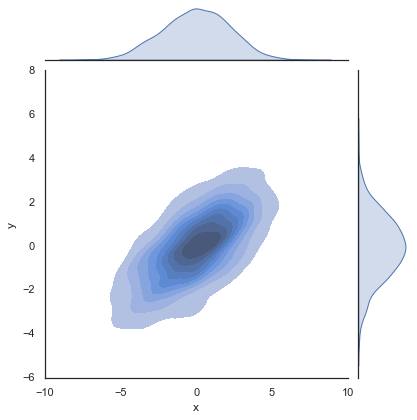

In [60]:
# Joint and marginal distribution
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde', fill=True)

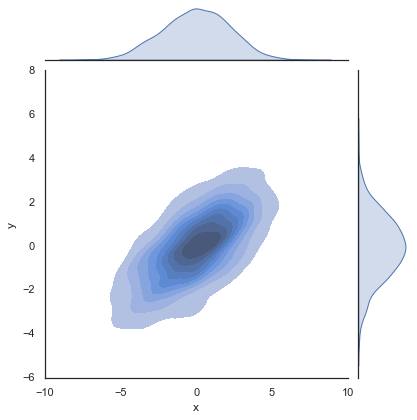

In [62]:
with sns.axes_style('white'):
    sns.jointplot(x='x', y='y', data=data, kind='kde', fill=True)

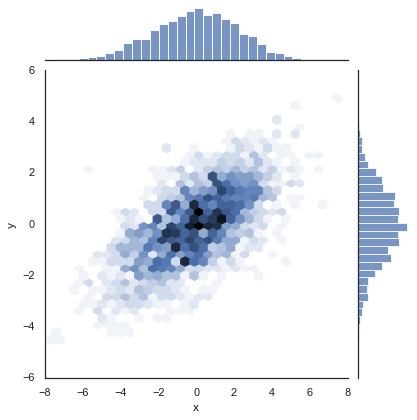

In [63]:
# another appearance
with sns.axes_style('white'):
    sns.jointplot(x='x', y='y', data=data, kind='hex')


In [65]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


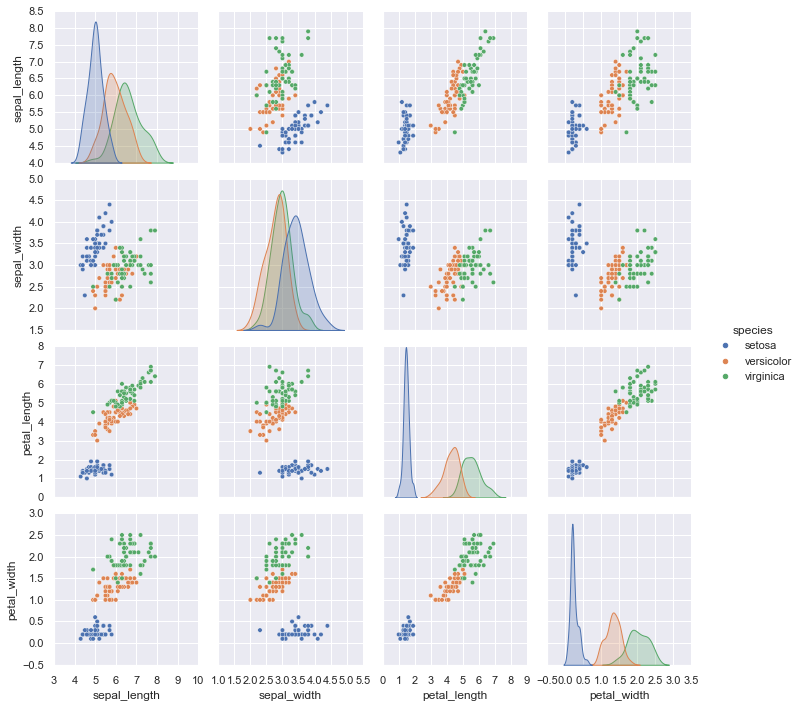

In [66]:
sns.pairplot(iris, hue='species')

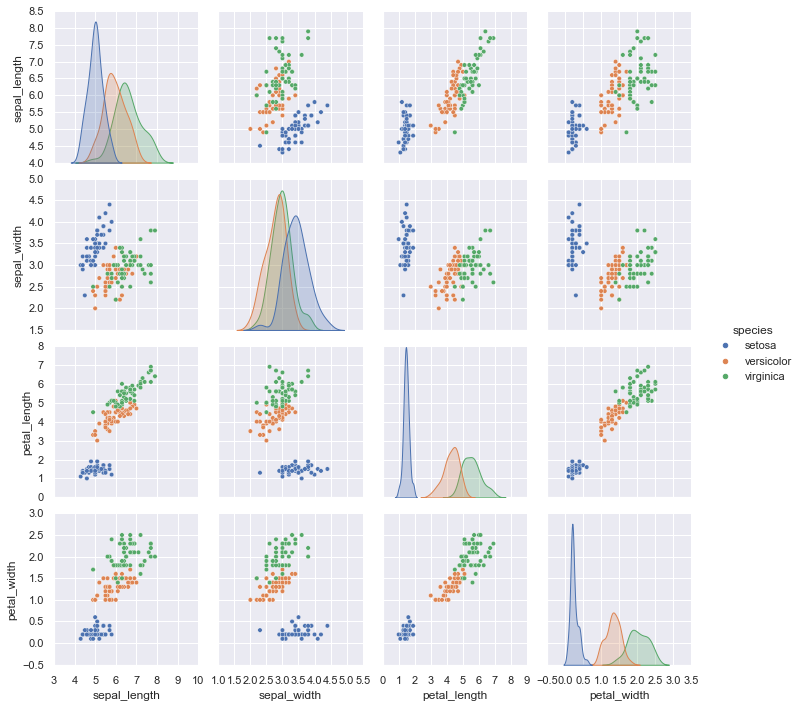

In [70]:
sns.pairplot(iris, hue='species', height=2.5)

In [71]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


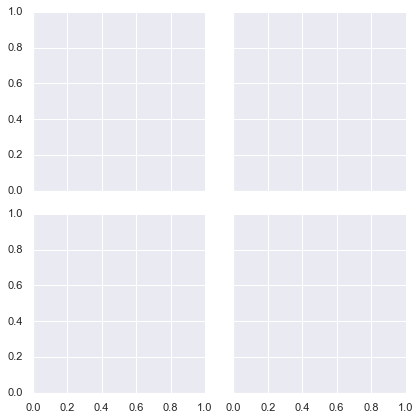

In [72]:
# facet
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)

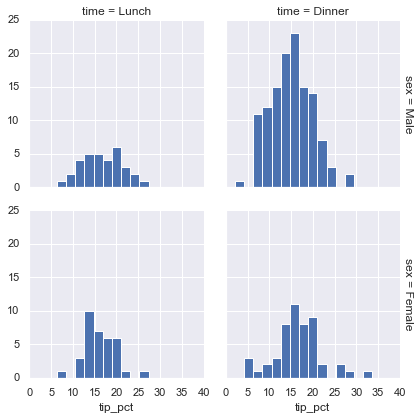

In [74]:
# facet histogram
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40,20))

C:\Users\guoly\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


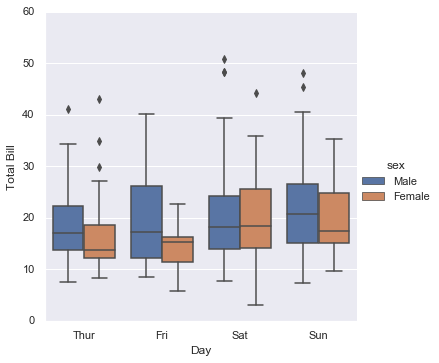

In [75]:
# factor plots
g = sns.factorplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
g.set_axis_labels('Day', 'Total Bill')

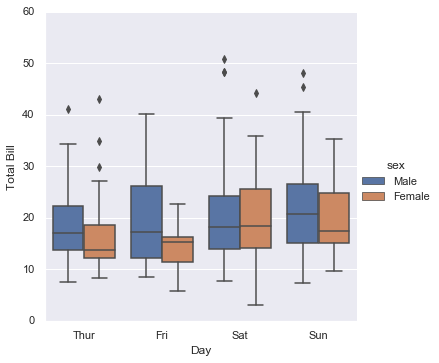

In [79]:
# cat plots
g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
g.set_axis_labels('Day', 'Total Bill')

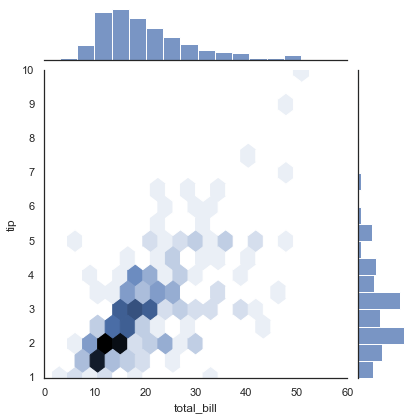

In [82]:
# joint dist
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

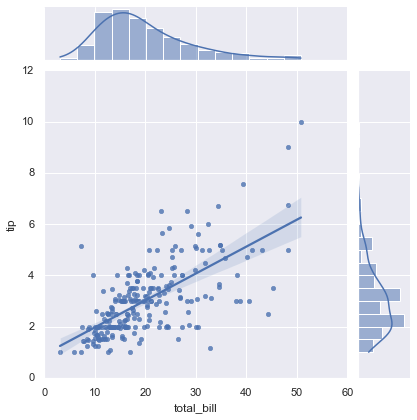

In [83]:
# another joint dist with regression
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

In [84]:
# data
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


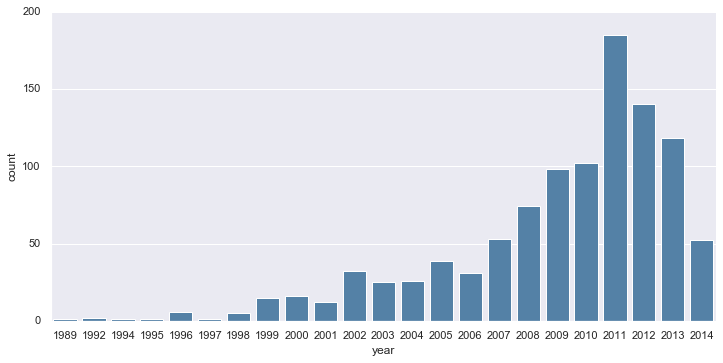

In [86]:
# bar plot
g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='steelblue')

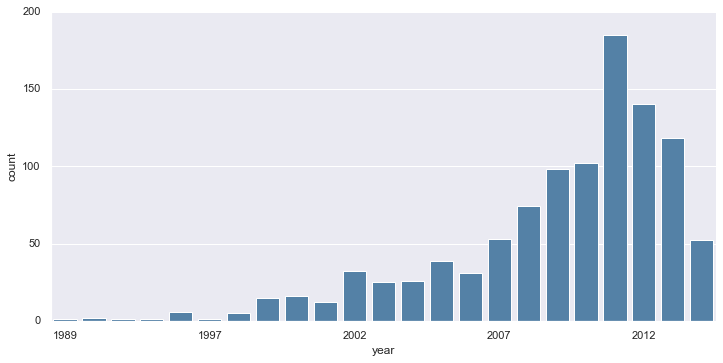

In [89]:
g = sns.catplot(x='year', data=planets, aspect=2, kind='count', color='steelblue')
g.set_xticklabels(step=5)

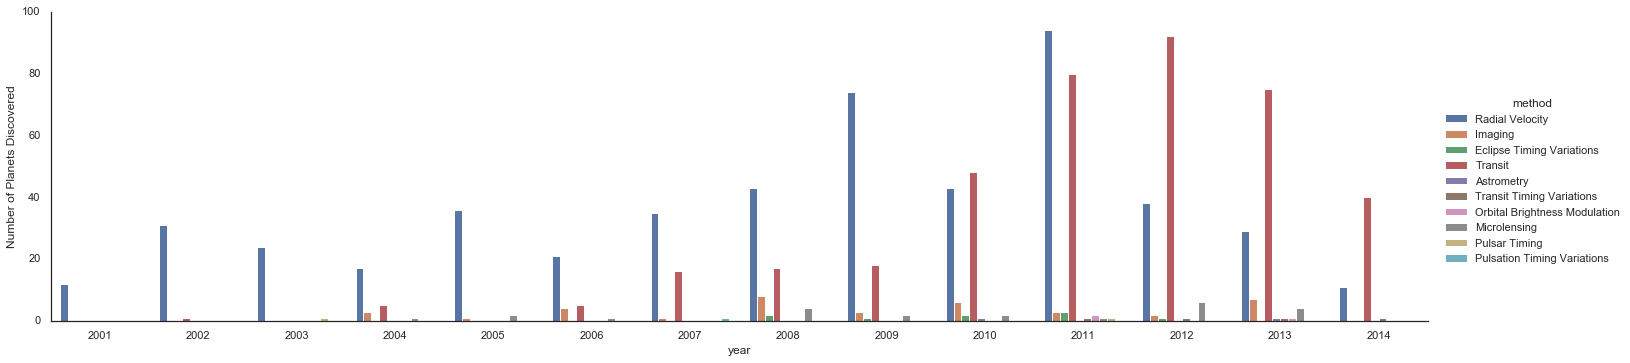

In [92]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

# Example

Marathon Finishing Times

In [93]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  836k  100  836k    0     0   836k      0  0:00:01 --:--:--  0:00:01 1371k


In [94]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [96]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [104]:
from datetime import timedelta

In [105]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv', converters={'split': convert_time, 'final': convert_time})

data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [106]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [108]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

TypeError: cannot astype a timedelta from [timedelta64[ns]] to [int32]